### Creating a Image Search Model for basic cat and dog images search

# Method 1 : Using DeepImageSearch (Automated)

In [1]:
import numpy as np
import pandas as pd
from DeepImageSearch import Index,LoadData,SearchImage

In [2]:
#Loading the data
image_list = LoadData().from_folder(folder_list = ['/home/dj/Pictures'])

#Indexing the Data
Index(image_list).Start()

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|██████████| 34/34 [00:50<00:00,  1.50s/it]
34it [00:00, 535.80it/s]

Image Meta Information Saved: [meta-data-files/image_data_features.pkl]
Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


In [3]:
#Searching without showing images
SearchImage().get_similar_images(image_path=image_list[1],number_of_images=5)

{1: '/home/dj/Pictures/Dog.jpg',
 26: '/home/dj/Pictures/Dog11.jpg',
 20: '/home/dj/Pictures/Dog13.jpg',
 10: '/home/dj/Pictures/Dog4.jpg',
 4: '/home/dj/Pictures/Dog10.jpg'}

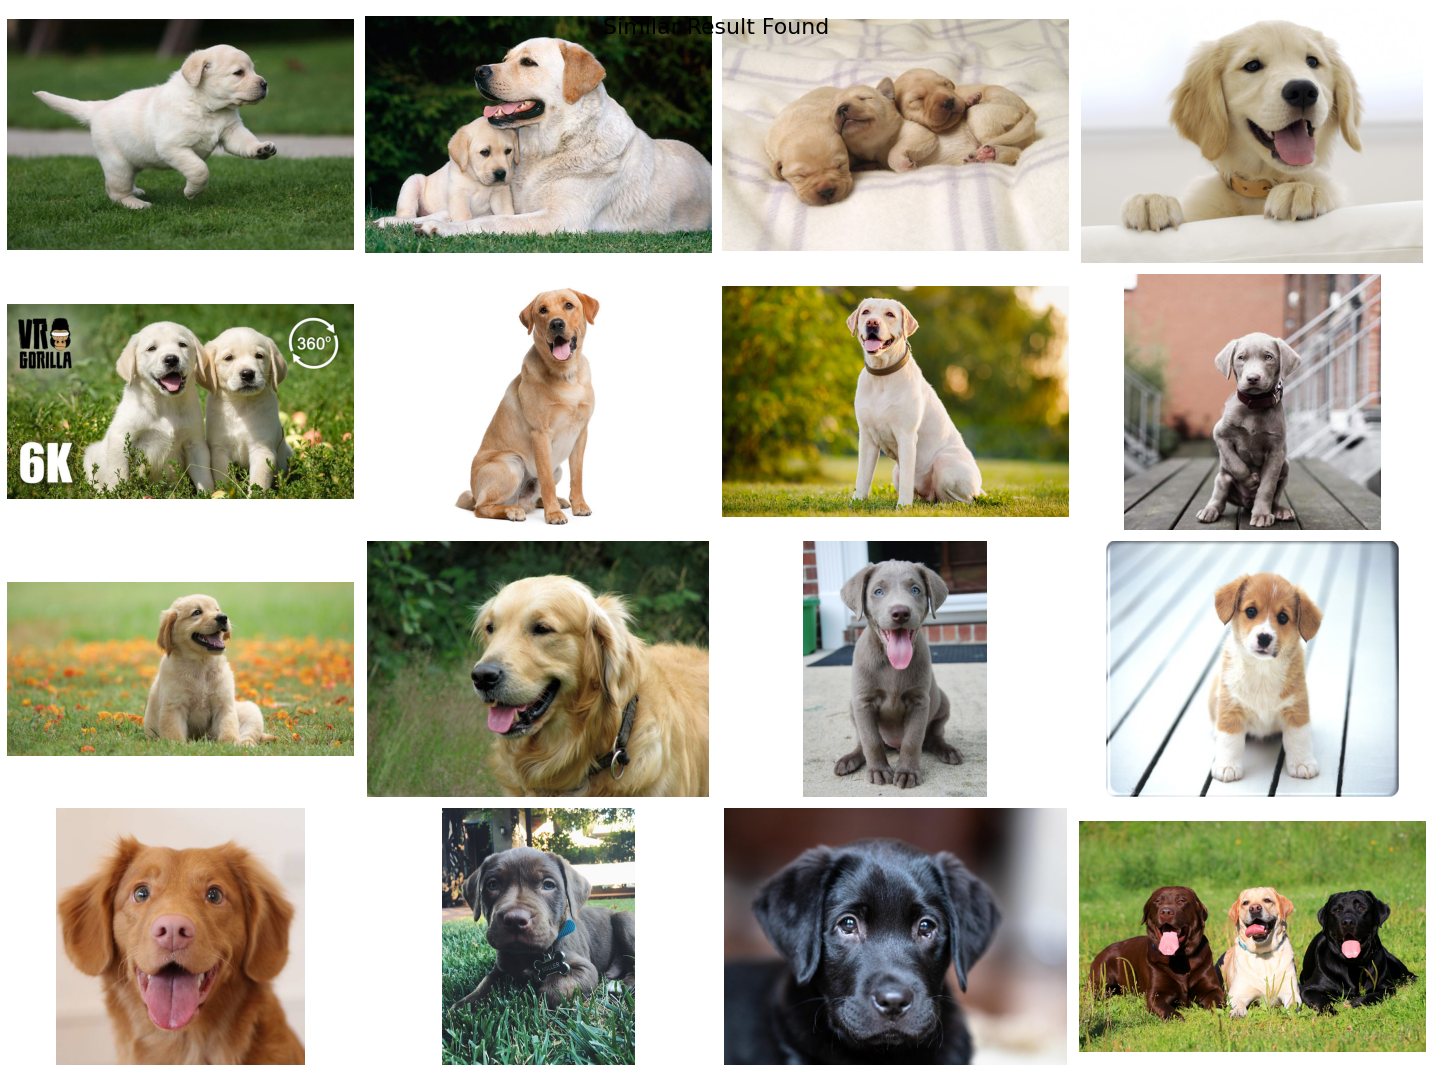

In [4]:
#Image Search with 16 images
SearchImage().plot_similar_images(image_path = image_list[1])

### This was Automated search using DeepImageSearch AI, Next I'm going to do it manually.

# Method 2 : Using Tensorflow + Keras + ResNet50

In [5]:
import os
import numpy as np
import os
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from sklearn.decomposition import PCA

In [7]:
#Creating & configuring model
img_size = 100
batch_size = 1
model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (img_size, img_size, 3), pooling = 'max')
data_dir = '/home/dj/Pictures'

img_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
data_gen = img_gen.flow_from_directory(data_dir,
                                       target_size = (img_size, img_size),
                                       batch_size = batch_size,
                                       class_mode = None,
                                       shuffle = False)

feature_list = model.predict_generator(data_gen, verbose = 1)

filenames = [data_dir + '/' + s for s in data_gen.filenames]

Found 34 images belonging to 2 classes.
34/34 [==============================] - 8s 148ms/step


(1, 8)


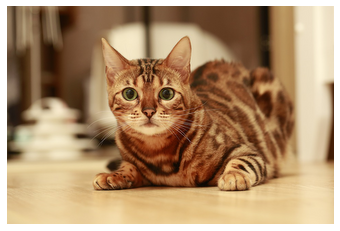

 Search Results Using Ball Tree


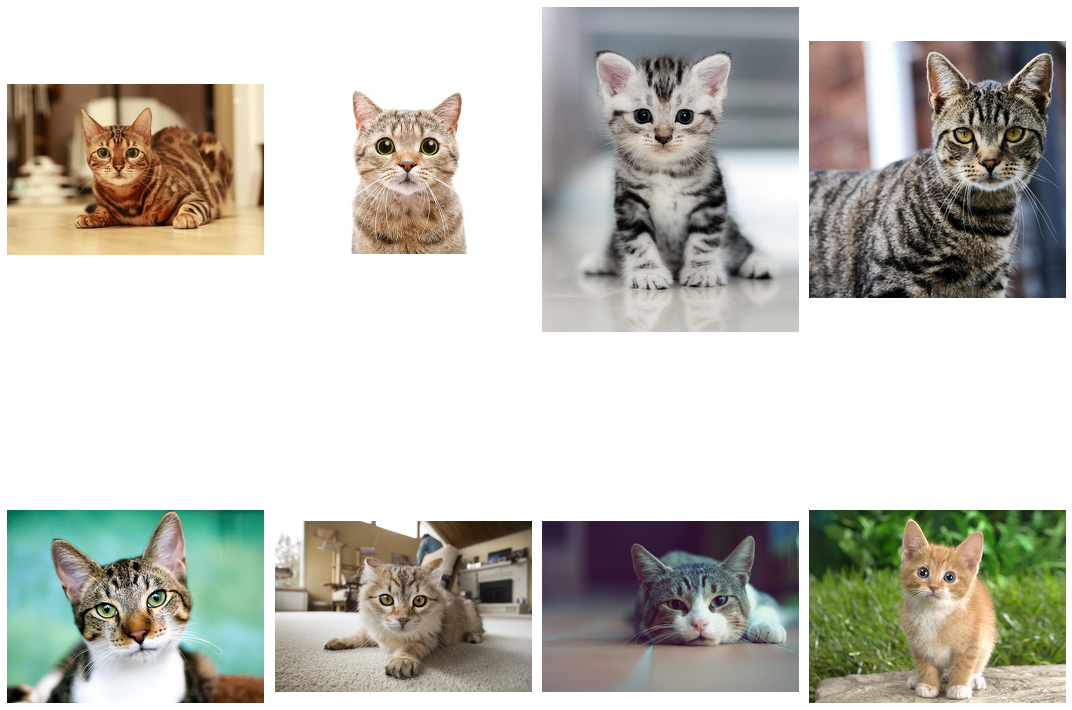

In [8]:
#Using Nearest Neighbor Technique with Ball Tree algo.
Search_results = NearestNeighbors(n_neighbors=8,                #8 - No of result images shown
                                  algorithm='ball_tree',
                                  metric='euclidean')
Search_results.fit(feature_list)

query_img = '/home/dj/Pictures/Dog/Cat8.jpg'                    #Selecting Query image
shape = (img_size, img_size, 3)
img = image.load_img(query_img, target_size = (shape[0], shape[1]))
img_arr = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_arr, axis=0)             #expanding dims to use 3d array
preprocessed_img = preprocess_input(expanded_img_array)

test_img_features = model.predict(preprocessed_img, batch_size=batch_size)
_, indices = Search_results.kneighbors(test_img_features)

#Function to show relevant images
def similar_images(indices):
    plt.figure(figsize = (15, 15), facecolor = 'white')
    plotnumber = 1    
    for index in indices:
        if plotnumber <= len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos'); plt.axis('off')         
            plotnumber += 1
    plt.tight_layout()

print(indices.shape)

plt.imshow(mpimg.imread(query_img), interpolation = 'lanczos')
plt.axis('off') 
plt.show()
print(' Search Results Using Ball Tree')
similar_images(indices[0])